# Temp Sensor

Modeling the energy consumption and current draw of a DS18B20 using the following parameters
Vdd = 3.3V
12 bit resolution
$R_{pu} = 4.7k\Omega$
sampling times and Current draws taken from data sheet

The Total Energy consumed is: 0.0374708025  J


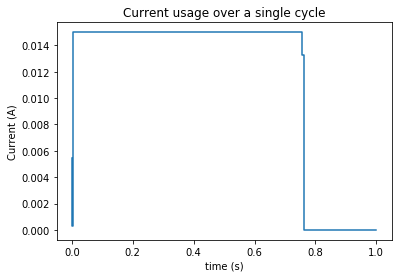

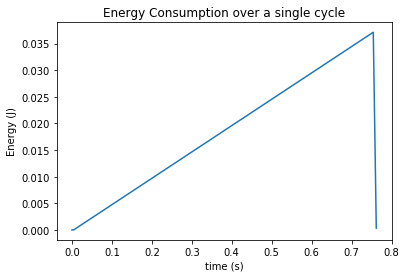

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math 
%matplotlib inline

# Parameter Definition
Vdd = 3.3 #V
Rpu = 4700 #Ohms
Isink = -4e-3
Idds  = 750e-9
Idd   = 15e-3
Idq = 5e-6
Cio = 10e-12 # capacitance on line
res = 12 #bits
# time periods
tconv = 750/1000     #seconds
treset = 480/1000000 #seconds
tpresence = 240/1000000
twrite_low = 60/1000000
twrite_high = 45/100000 #15seconds after a write low
twrite_recovery = 1e-6


# Typical command structure:
#1: init 2: ROM function Command 3: Function Command 4: Transaction
Trom = 8*(twrite_high+ twrite_recovery)
Treset = treset+tpresence + 15e-6
#Sensors Cycle:
# 1: Reset 2: convert 3: Read 4: idle


T= Treset + Trom + tconv + 16*(twrite_high + twrite_recovery) # 16 bits

e_rom = 4*(Idd*15e-6)*Vdd+4*0.3*Idd*15e-6 # 33h command (0b00110011)
I_rom_avg = e_rom/(Vdd*Trom)

e_low = 0.3*Idd*treset
e_presence = 0.3*Idd*tpresence
e_pullup = 3.3*Idd*tpresence
e_convert = 3.3*Idd*tconv

#reading temp: each read is proceeded by a low for 60 seconds
e_low = 0.3*Idd*twrite_low
e_rec = Vdd*Idd*twrite_recovery
e_read_1_byte = Vdd*Idd*twrite_high +0.3*Idd*(twrite_low-twrite_high)

Tread = twrite_low+16*(twrite_high+15e-6)+15*(twrite_recovery)

e_read = 16*e_read_1_byte+15*e_rec +e_low  # for worst case i.e. 0b11111111111111111
I_read_avg = e_read/(Vdd*Tread)

#Reset energy concumption
e_init = e_low+e_presence+e_pullup

I_init_avg = e_init/(Vdd*Treset)

#plot cycle
t1 = Treset
t2 = t1+Trom
t3 = t2+tconv
t4 = t3+Tread
x  = [0,t1,t1,t2,t2,t3,t3,t4,t4,1]
y  = [I_init_avg,I_init_avg,I_rom_avg,I_rom_avg,Idd,Idd,I_read_avg,I_read_avg,Idds,Idds]


fig = plt.figure()
ax = plt.axes()
ax.plot(x,y)
ax.set_xlabel("time (s)")
ax.set_ylabel("Current (A)")
ax.set_title("Current usage over a single cycle")
x2  = [0,t1,t2,t3,t4]
y2 = [0,e_init,e_rom,e_convert,e_read]


# display values
fig2 = plt.figure()
ax2 = plt.axes()
ax2.plot(x2,y2)
ax2.set_xlabel("time (s)")
ax2.set_ylabel("Energy (J)")
ax2.set_title("Energy Consumption over a single cycle")

etot = e_init+e_rom+e_convert+e_read;

print("The Total Energy consumed is:",etot," J")


# IMU

Energy consumption and current draw of a NXP 9dof breakout board 
device samples at 10Hz for 20 mins continuous
assuming worst case each bit takes the longest allocated slot to read assuming ODR set to 25 in hybrid mode

The average current over a  1200  second sampling period is:  2.054820202020202  uA
The Max current is 0.074 mA
The current consumption over a 20 min sample period @ 10Hz is 0.00805571712  J


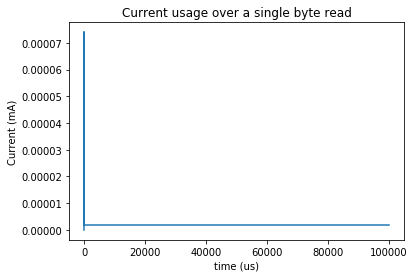

In [9]:
from matplotlib import pyplot as plt
import numpy as np
import math 
%matplotlib inline

#FX
#parameters
Vdd = 3.3
Idd_active  = 74e-6
Idd_rdy = 1.6e-3
Idd_stby = 2e-6
Ton = 20*60
#timing paramters for a single byte
Fs = 10 #Hz 
Tstart = 0.6e-6
Tda = 7*1.3e-6 #6 bit device address
Tw = 1.3e-6    #(write low to read)
Tak = 0.9e-6
Treg = 8*1.3e-6
Tsr = 1.2e-6 #(set up time + hold time)
Tf = 300e-9
Tr = 300e-9
Tdata = 8*(1.3e-6)
Tsto = 0.6e-6+1.3e-6+Tr

Twake = Tstart+ Tda+Tw +3*Tak +Treg+Tsr+Tda+0.6e-6+Tdata+ Tsto;

Tstdby = 1/Fs - Twake

# basic cycle: 
# The device has no specific cyclic power requirements it is advisible to turn the device off and only wake it when its needed
# patttern: wake up -> active -> off
x  = [0,0,Twake*1e6,Twake*1e6,100000];
y = [0,Idd_active,Idd_active,Idd_stby,Idd_stby]

fig = plt.figure();
ax = plt.axes();
ax.plot(x,y);
ax.set_xlabel("time (us)");
ax.set_ylabel("Current (mA)");
ax.set_title("Current usage over a single byte read");

Iah = (Idd_active*Twake/(3600) +Idd_stby*Tstdby/3600)*Fs*Ton
print("The average current over a ",Ton," second sampling period is: ",Iah*1e6/0.33," uA")
print("The Max current is",Idd_active*1e3,"mA")
etot = 3.3*(Idd_active*Twake+Idd_stby*(Tstdby))*20*60*10;
print("The energy consumption over a 20 min sample period @ 10Hz is",etot," J")

# Gyro

Energy consumption of FXAS21002.  
Sampling at 10Hz Resolution of 16 bits  
Full Scale Range of 1000 dps


Active on time is  264.74999999999994 us
Standby to Active transition time at  200  Hz is  60.005  ms
Ready to Active transition time at  200  Hz is  5.005  ms
Sampling at 100ms
Maximum current Imax =  2.7  mA
current consumption over 20 min sample perido @ 10Hz is 0.0637897788  J


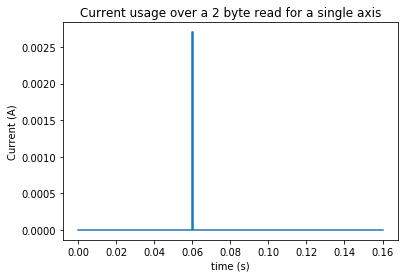

In [13]:
from matplotlib import pyplot as plt
import numpy as np
import math 
%matplotlib inline

Vdd = 3.3
Idd_act =2.7e-3
Idd_rdy = 1.6e-3
Idd_stdby = 2.8e-6 
ODR = 200

#transition time charachteristics
Tstdy_act = (1/ODR +60)*1e-3
Trdy_act = (1/ODR+5)*1e-3

#I2C characteristics

fs = 100
tbus = 4.7e-6
tstart = 4.7e-6
tsr = tstart+ 4e-6
tsp = 4e-6+tbus
tack = 3.45e-6
tlow = 4.7e-6
thigh = 4e-6
tr = 1000e-9
tf = 300e-9
Cb = 400e-12
Tdadd = 6*(tr+tlow+tf)+(tr+thigh+tf) #0x20 
Treg  = 8*(tr+thigh+tf) #0x00 - 0x06 (take longest as worst case)

#active read cycle for 2 bytes

Tactive = tstart + Tdadd+(tr+tlow+tf)+2*tack +Treg+tsr+Tdadd+(tr+thigh+tf)+tack+16*(tr+tlow+tf)+tsp 
print("Active on time is ",Tactive*1e6,"us")
print("Standby to Active transition time at ",ODR," Hz is ",Tstdy_act*1e3," ms")
print("Ready to Active transition time at ",ODR," Hz is ",Trdy_act*1e3," ms")
print("Sampling at 100ms")

Tstdby = 100e-3 - Tactive

#cycle wake up -> stdby -> active -> stdby x 20*60*10Hz 
t1 = Tstdy_act
t2 = Tstdy_act+Tactive
t3 = t2+Tstdby-Tstdy_act
t4 = t3+Tstdy_act
x  = [0,t1,t1,t2,t2,t3,t3,t4];
y = [Idd_stdby,Idd_stdby,Idd_act,Idd_act,Idd_stdby,Idd_stdby,Idd_stdby,Idd_stdby]

fig = plt.figure();
ax = plt.axes();
ax.plot(x,y);
ax.set_xlabel("time (s)");
ax.set_ylabel("Current (A)");
ax.set_title("Current usage over a 2 byte read for a single axis");

print("Maximum current Imax = ",Idd_act*1e3," mA")

etot = 3.3*(Idd_stdby*(t1)+Idd_act*Tactive+Idd_stdby*(t3+t4))*20*60*10;
print("current consumption over 20 min sample perido @ 10Hz is",etot," J")


## GPS

module: neo -7m  
UART: (4800 - 115200) bit/s 8 bits no parity 1 stop bit. Configured to transmit both NMEA and UBX protocols, but only the following NMEA (and no UBX)
messages have been activated at start-up:GGA, GLL, GSA, GSV, RMC, VTG, TXT  
Time pulse: 1 pulse per second, synchronized at rising edge, pulse length 100ms
Assuming GPS is set in On/Off power management mode 1 sample every 4 hours. If no sample is obtained, try again every hour

The peak current is:  0.022  mA
The total energy consumption is 8.018999999999998 J


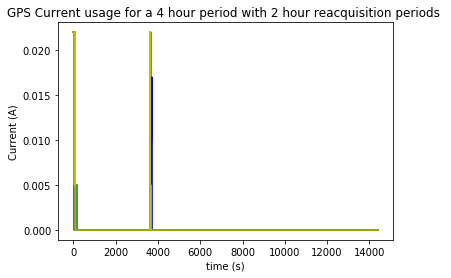

In [18]:
from matplotlib import pyplot as plt
import numpy as np
import math 
%matplotlib inline

#parameter Decleration

V_dd = 3.3
#Continuous mode opperation
Icc_max = 67e-3
Icc_acq = 22e-3
Icc_trk = 17e-3

#power save mode
Icc_trk_ps = 5e-3

#timing
Tupdate = 4*3600
Tsearch = 3600
Ttimepulse = 100e-3
baude = 9600
T_bit = 8/baude
T_on = 60  
T_acq = 30 #assuming cold start

#typical successful cycle: 
# first on -> acquisition -> Tracking state for Ton -> Inactive for update (T-Ton)


t1 = T_acq;
t2 = t1+T_on;

x = [0,t1,t1,t2,t2,Tupdate]
y = [Icc_acq,Icc_acq,Icc_trk_ps,Icc_trk_ps,0,0]

#typical unsuccessful cycle (signal loss during acquisition):
# first on -> acquisition -> Inactive for updates (Tsearch) -> restart acquistion -> Track (Ton)
t2 = Tsearch+t1;
t3 = t2+T_acq;
t4 = t3+T_on;

x1 = [0,t1,t1,t2,t2,t3,t3,t4,t4,Tupdate]
y1 = [Icc_acq,Icc_acq,0,0,Icc_acq,Icc_acq,Icc_trk_ps,Icc_trk,0,0]

#Unsuccessful cycle (signal loss during tracking and reaquired)
# first on ->acquisition -> Tracking (Ton-Tloss) ->Tacquire->Ttrack (Ton_new)
#assume timeout occurs halfway through tracking
t2 = t1+T_on/2;
t3 = t2+T_acq;
t4 = t3+T_on;

x2 = [0,t1,t1,t2,t2,t3,t3,t4,t4,Tupdate]
y2 = [Icc_acq,Icc_acq,Icc_trk_ps,Icc_trk_ps,Icc_acq,Icc_acq,Icc_trk_ps,Icc_trk_ps,0,0]
#Unsuccessful cycle (signal loss during tracking )
# first on ->acquisition -> Tracking (Ton-Tloss) ->Tacquire-> Inactive for update

t4 = Tsearch;
t5 = t4 + T_acq;
t6 = t5+ T_on;
fig = plt.figure();

x3 = [0,t1,t1,t2,t2,t3,t3,t4,t4,t5,t5,t6,t6,Tupdate]
y3 = [Icc_acq,Icc_acq,Icc_trk_ps,Icc_trk_ps,Icc_acq,Icc_acq,0,0,Icc_acq,Icc_acq,Icc_trk_ps,Icc_trk_ps,0,0]

ax = plt.axes();
ax.plot(x,y,'r');
ax.plot(x1,y1,'b');
ax.plot(x2,y2,'g');
ax.plot(x3,y3,'y');
ax.set_xlabel("time (s)");
ax.set_ylabel("Current (A)");
ax.set_title("GPS Current usage for a 4 hour period with 2 hour reacquisition periods ");

#assuming worst case 
etot = 3.3*(3*Icc_acq*T_acq +3*Icc_trk_ps*(T_on/2))
print("The peak current is: ",Icc_acq," mA");
print("The total energy consumption is",etot,"J")


# power requirement 

In order to meet the requirements for the aforementioned energy cycles, the battery Drain must be large enough to accomodate a maxumum current draw of 25mA.
Assuming A 4 hour cycle, given the calculated current consumptions and 5 months of opperation
Assuming Lithium Thionyl Chloride batteries 1.2Ah,3.3V

In [26]:
etot_cycle = 8.06+0.064+0.008+0.037 #TODO: Iridium
Ncycles = (24/4)*31*5;

e_tot = etot_cycle*Ncycles;

print("Total capacity  requirement:",e_tot,"J");

Cap_tot = e_tot/(3600*3.3)
NBatteries = Cap_tot/1.2

print("Total batteries needed: ",NBatteries)

Total capacity  requirement: 7597.17 J
Total batteries needed:  0.5329103535353535
